In [1]:
import torch
from engine.model_base import LightningBaseModule
from engine import lstm
from engine.metrics import accuracy 
from sklearn.metrics import confusion_matrix
from engine.analyzer import get_logs_info, get_model_from_log

from pathlib import Path
import yaml

from typing import Dict
import numpy as np

from engine.data import get_data_loader

import seaborn as sns
import pickle as pkl
import matplotlib.pyplot as plt

# Config

In [2]:
with open('data/converted/encoder.pkl', 'rb') as f:
    encoder = pkl.load(f)

In [3]:
root = Path('lightning_logs')
test_loader = get_data_loader('test')

In [4]:
logs = get_logs_info()

# Choose your model here

In [9]:
model_logs = logs['lightning_logs/version_5']
model = get_model_from_log(model_logs)

# Analysis - technical

In [10]:
scores = []
y_preds = []
ys = []

for X, y in test_loader:
    y_pred = model(X)
    y_pred = torch.argmax(y_pred, dim=1)
    
    y_preds.append(y_pred.to('cpu').numpy())
    ys.append(y.to('cpu').numpy())
    
    score = accuracy(y, y_pred)
    scores.append(score)

/home/dawid/miniconda3/envs/dl/lib/python3.10/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [13]:
y_preds = np.concatenate(y_preds)
ys = np.concatenate(ys)
labels = encoder.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11])

# Analysis - numbers, plots

In [32]:
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Params number: {pytorch_total_params}')

Params number: 349196


In [31]:
print(f'accuracy on test: {np.mean(scores):.3f}')

accuracy on test: 0.619


<Axes: >

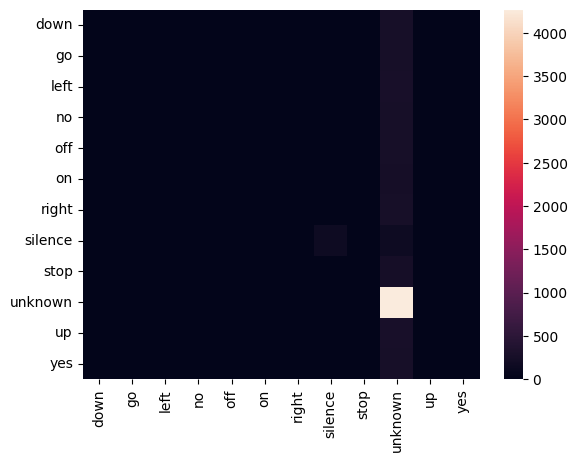

In [14]:
labels = encoder.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11])
sns.heatmap(confusion_matrix(ys, y_preds), xticklabels=labels, yticklabels=labels)